Since we have a collection of images instead of tabular data, there are limited number of operation for feature engineering, as like for EDA. Two major operations are assesing importance of having:

- Colored (RGB) or grayscale images

- Lower or higher image resolution

If not result in decreasing model accuracy, using grayscale image can save computational cost since the array sizes decrease (i.e. (100x100x3) versus (100x100x1)). In certain cases, it can seriously effect model prediction accuracy. Similarly, lower image resolution can save computational cost (i.e. (150x150x3) versus (100x100x3)).

In [16]:
import os
import cv2
import shutil

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow
import warnings


### Prepare dataset

In [2]:
train_dir = '../data/train'
valid_dir = '../data/validation'

### Preparing data and basic model for RGB

In [6]:
train_datagen_rgb = ImageDataGenerator(rescale=1./255)

train_generator_rgb = train_datagen_rgb.flow_from_directory(train_dir,
                                                    target_size=(100, 100),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 824 images belonging to 2 classes.


In [8]:
val_datagen_rgb = ImageDataGenerator(rescale=1./255)
validation_generator_rgb = val_datagen_rgb.flow_from_directory(valid_dir,
                                                        target_size=(100, 100),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 274 images belonging to 2 classes.


In [ ]:
model_rgb = models.Sequential()

model_rgb.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
model_rgb.add(layers.MaxPooling2D((2, 2)))
model_rgb.add(layers.Flatten())
model_rgb.add(layers.Dense(64, activation='relu'))
model_rgb.add(layers.Dense(1, activation='sigmoid'))

model_rgb.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

history_rgb = model_rgb.fit(
    train_generator_rgb,
    epochs=25,
    validation_data=validation_generator_rgb
    )

### Preparing Basic model for GrayScale

In [3]:
train_datagen_gray = ImageDataGenerator(rescale=1./255)

train_generator_gray = train_datagen_gray.flow_from_directory(train_dir,
                                                    target_size=(100, 100),
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    color_mode='grayscale')

Found 824 images belonging to 2 classes.


In [4]:
val_datagen_gray = ImageDataGenerator(rescale=1./255)
validation_generator_gray = val_datagen_gray.flow_from_directory(valid_dir,
                                                        target_size=(100, 100),
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        color_mode='grayscale')

Found 274 images belonging to 2 classes.


In [ ]:
model_gray = models.Sequential()

model_gray.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 1)))
model_gray.add(layers.MaxPooling2D((2, 2)))
model_gray.add(layers.Flatten())
model_gray.add(layers.Dense(64, activation='relu'))
model_gray.add(layers.Dense(1, activation='sigmoid'))

model_gray.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

history_gray = model_gray.fit(
    train_generator_gray,
    epochs=25,
    validation_data=validation_generator_gray
    )

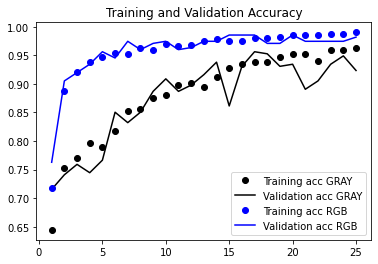

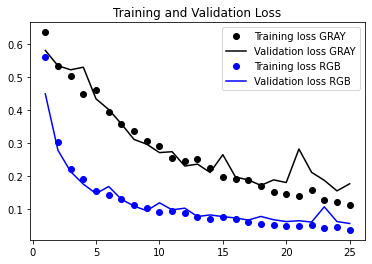

In [19]:
acc_gray = history_gray.history['acc']
val_acc_gray = history_gray.history['val_acc']
loss_gray = history_gray.history['loss']
val_loss_gray = history_gray.history['val_loss']

epochs = range(1, len(acc_gray) + 1)

acc_rgb = history_rgb.history['acc']
val_acc_rgb = history_rgb.history['val_acc']
loss_rgb = history_rgb.history['loss']
val_loss_rgb = history_rgb.history['val_loss']

plt.plot(epochs, acc_gray, 'bo', label='Training acc GRAY', color='black')
plt.plot(epochs, val_acc_gray, 'b', label='Validation acc GRAY', color='black')

plt.plot(epochs, acc_rgb, 'bo', label='Training acc RGB')
plt.plot(epochs, val_acc_rgb, 'b', label='Validation acc RGB')

plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss_gray, 'bo', label='Training loss GRAY', color='black')
plt.plot(epochs, val_loss_gray, 'b', label='Validation loss GRAY', color='black')
plt.plot(epochs, loss_rgb, 'bo', label='Training loss RGB')
plt.plot(epochs, val_loss_rgb, 'b', label='Validation loss RGB')

plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Preparing data and basic model for image size comparison

Compare the above RGB model with a higher resolution version

In [20]:
train_datagen_rgb_high = ImageDataGenerator(rescale=1./255)

train_generator_rgb_high = train_datagen_rgb_high.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 824 images belonging to 2 classes.


In [21]:
val_datagen_rgb_high = ImageDataGenerator(rescale=1./255)
validation_generator_rgb_high = val_datagen_rgb_high.flow_from_directory(valid_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 274 images belonging to 2 classes.


In [ ]:
model_rgb_high = models.Sequential()

model_rgb_high.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model_rgb_high.add(layers.MaxPooling2D((2, 2)))
model_rgb_high.add(layers.Flatten())
model_rgb_high.add(layers.Dense(64, activation='relu'))
model_rgb_high.add(layers.Dense(1, activation='sigmoid'))

model_rgb_high.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

history_rgb_high = model_rgb_high.fit(
    train_generator_rgb_high,
    epochs=25,
    validation_data=validation_generator_rgb_high
    )

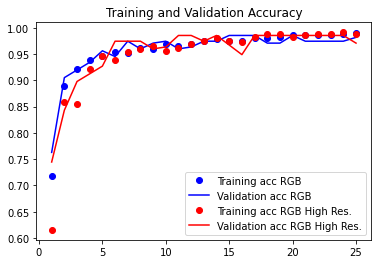

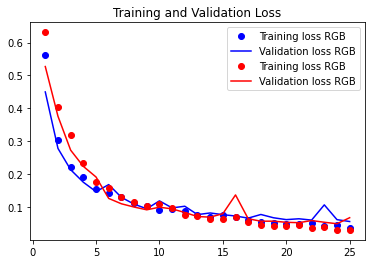

In [24]:
acc_rgb_high = history_rgb_high.history['acc']
val_acc_rgb_high = history_rgb_high.history['val_acc']
loss_rgb_high = history_rgb_high.history['loss']
val_loss_rgb_high = history_rgb_high.history['val_loss']

epochs = range(1, len(acc_gray) + 1)

acc_rgb = history_rgb.history['acc']
val_acc_rgb = history_rgb.history['val_acc']
loss_rgb = history_rgb.history['loss']
val_loss_rgb = history_rgb.history['val_loss']

plt.plot(epochs, acc_rgb, 'bo', label='Training acc RGB')
plt.plot(epochs, val_acc_rgb, 'b', label='Validation acc RGB')

plt.plot(epochs, acc_rgb_high, 'bo', label='Training acc RGB High Res.', color='red')
plt.plot(epochs, val_acc_rgb_high, 'b', label='Validation acc RGB High Res.', color='red')

plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss_rgb, 'bo', label='Training loss RGB')
plt.plot(epochs, val_loss_rgb, 'b', label='Validation loss RGB')
plt.plot(epochs, loss_rgb_high, 'bo', label='Training loss RGB', color='red')
plt.plot(epochs, val_loss_rgb_high, 'b', label='Validation loss RGB', color='red')

plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Conclusion

- RGB images yield higher prediction accuracy. It is worth to use them despite higher computational load.
  
- Increasing the target image size (100x100x3) to (150x150x3) doesn't improve prediction accuracy. It can be kept lower to save computational load.